# Capstone Project on Artificial Intelligence(CV)

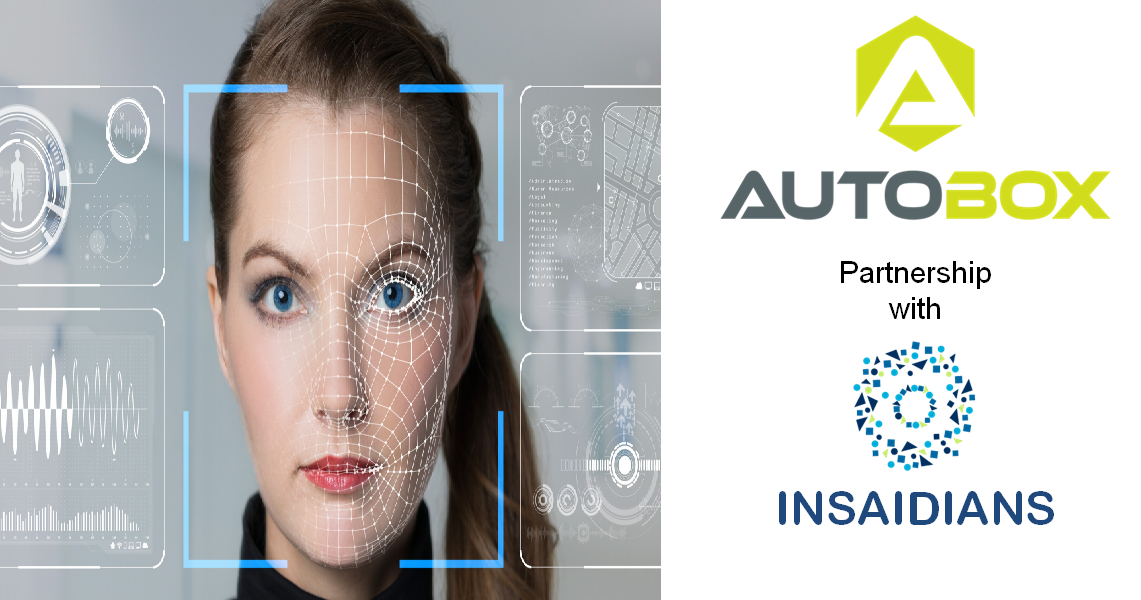

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Problem Statement</a></span></li><li><span><a href="#Data-Description" data-toc-modified-id="Data-Description-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Description</a></span></li><li><span><a href="#Importing-Libraries" data-toc-modified-id="Importing-Libraries-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Importing Libraries</a></span></li><li><span><a href="#Importing-the-datasets" data-toc-modified-id="Importing-the-datasets-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Importing the datasets</a></span></li><li><span><a href="#Train-and-Valid-images" data-toc-modified-id="Train-and-Valid-images-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Train and Valid images</a></span><ul class="toc-item"><li><span><a href="#Face-Extraction" data-toc-modified-id="Face-Extraction-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Face Extraction</a></span></li><li><span><a href="#Create-Face-Embeddings" data-toc-modified-id="Create-Face-Embeddings-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Create Face Embeddings</a></span></li><li><span><a href="#Perform-Face-Classification" data-toc-modified-id="Perform-Face-Classification-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Perform Face Classification</a></span></li><li><span><a href="#T-SNE-Plot" data-toc-modified-id="T-SNE-Plot-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>T-SNE Plot</a></span></li></ul></li><li><span><a href="#Test-Data" data-toc-modified-id="Test-Data-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Test Data</a></span><ul class="toc-item"><li><span><a href="#Test-Data-Loading" data-toc-modified-id="Test-Data-Loading-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Test Data Loading</a></span></li><li><span><a href="#Face-Extraction" data-toc-modified-id="Face-Extraction-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Face Extraction</a></span></li><li><span><a href="#Create-Face-Embeddings" data-toc-modified-id="Create-Face-Embeddings-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Create Face Embeddings</a></span></li><li><span><a href="#Prediction" data-toc-modified-id="Prediction-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Prediction</a></span></li><li><span><a href="#Test-Submission" data-toc-modified-id="Test-Submission-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Test Submission</a></span></li></ul></li></ul></div>

##  Introduction

The client for this project is the Administration Department at AutoBox having over a thousand employees.

They want to maintain a central database of all of their employees.
And, extra emphasis is on increasing security and ease of operation.
The idea is to create a web-based app for Facial Recognition in order to have rightful entry to the office premises and restrict any trespassers.

Once the employees are identified on a daily basis, they can have a simple entry and exit procedure without any manual intervention.

They want to deal with their existing employee’s database and those coming in as a new recruit.

__Current Practice:__

The existing employees or the ones joining the Company gets a card having a QR(RFID) code with unique identification for entry and exit.

__The current practice suffers from the following problems:__

This approach is too haphazard. The quality of insight gained is misaligned due to misleading data.
The second problem is these insights can't be aggregated to frame certain policies on this.
The third problem is the security breach of the Company, which can hamper the situation very badly.

The Admin Department has hired you as an AI Engineer. They want to supplement their security protocols with a more proactive approach.

##  Problem Statement

- You will be provided with a dataset consisting of images of various celebrities.
- You should also add your images to the data. The procedure for adding your images is mentioned in Week - 1 mailer.
- Then you have to build a face recognition model using the Image data from the database provided above.
- The model should be able to detect faces from images and recognize the person present in the image.
- The recognized person will then be authorized to enter or exit the company premises.

__Problem Specifics__

- __Deliverable:__ Predict whether the person will be allowed entry or exit into the company premises.
- __Deep Learning task:__ Build a Face Recognition model using FaceNet
- __Target:__ Predict the name of the person in the image.
- __Win condition:__ The model should be able to recognize the person present in the images, and if the model hasn’t seen a person before, it should output a message suggesting that this person is not found in the database and entry is restricted, and label it as Unidentified in the submission file.


##  Data Description

The Business Intelligence Analysts of the Company provided you with a dataset that contains images of different celebrities.

The dataset is divided into three parts: train, val, and test set.

Each image in the dataset is a .jpg colored image.

__train and val:__

- The train and val sets contain images of 15 different celebrities.
- The images are present in 15 different sub-directories in both folders.
- These sub-directories are named after the celebrity they contain the images of where the first name and the last name of the celeb is separated by an underscore ‘_’ for example Arnold_Schwarzenegger.
- There are more than 10 images of each celebrity in the train set.
- There are 5 images of each celebrity in the val set.
- Each image in the sub-directory of both the train and val set is named in such a way that they first contain the name of the sub-directory and then a number separated by an underscore ‘_’ for example Arnold_Schwarzenegger_0001.jpg

__test:__

- The test set contains 22 different images.
- These images are named from 1 to 22.
- A sample submission csv file named sample_submission.csv is also provided with the test set.
- This sample submission file contains the format of the final predictions submission csv file that you need to upload via the Upload Submission tab.

## Importing Libraries

In [1]:
!pip install -q mtcnn

     |████████████████████████████████| 2.3 MB 6.9 MB/s 


In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import os
import random

from tqdm import tqdm_notebook as tqdm
tqdm().pandas()

from PIL import Image
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC

from mtcnn.mtcnn import MTCNN

0it [00:00, ?it/s]

## Importing the datasets

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
ROOT_PATH = '/content/gdrive/My Drive/data/'

TRAIN_PATH = '/content/gdrive/My Drive/data/train/'

VAL_PATH = '/content/gdrive/My Drive/data/val/'

TEST_PATH = '/content/gdrive/My Drive/data/test/'

__Function__

In [5]:
# extract a single face from a given Image
def extract_face(filename, required_size=(160, 160)):
    image = Image.open(filename)
    image = image.convert('RGB')
    pixels = np.asarray(image)
    
    detector = MTCNN()
    results = detector.detect_faces(pixels)
    
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    # bug fix
    x1, y1 = abs(x1), abs(y1)
    
    x2, y2 = x1 + width, y1 + height
    
    face = pixels[y1:y2, x1:x2]
    
    image = Image.fromarray(face)
    
    image = image.resize(required_size)
    face_array = np.asarray(image)
    
    return face_array

In [6]:
def load_faces(directory):
    faces = list()
    for file_name in tqdm(os.listdir(directory)):
        path = directory + file_name
        face = extract_face(path)
        
        faces.append(face)
    return faces

In [7]:
def load_dataset(directory):
    images, labels = list(), list()
    for folder in tqdm(os.listdir(directory)):
        path = directory + folder + '/'
        
        if not os.path.isdir(path):
            continue
        
        faces = load_faces(path)

        print(f'Celebrity : {folder}, Faces : {len(faces)}')

        label = [folder for _ in range(len(faces))]

        images.extend(faces)
        labels.extend(label)
        
    return np.asarray(images), np.asarray(labels)

## Train and Valid images

### Face Extraction

In [8]:
X_train, y_train = load_dataset(TRAIN_PATH)

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

Celebrity : Serena_Williams, Faces : 39


  0%|          | 0/38 [00:00<?, ?it/s]

Celebrity : Vladimir_Putin, Faces : 38


  0%|          | 0/18 [00:00<?, ?it/s]

Celebrity : Winona_Ryder, Faces : 18


  0%|          | 0/22 [00:00<?, ?it/s]

Celebrity : mindy_kaling, Faces : 22


  0%|          | 0/19 [00:00<?, ?it/s]

Celebrity : madonna, Faces : 19


  0%|          | 0/17 [00:00<?, ?it/s]

Celebrity : Tiger_Woods, Faces : 17


  0%|          | 0/16 [00:00<?, ?it/s]

Celebrity : Naomi_Watts, Faces : 16


  0%|          | 0/12 [00:00<?, ?it/s]

Celebrity : Michael_Schumacher, Faces : 12


  0%|          | 0/11 [00:00<?, ?it/s]

Celebrity : Bill_Gates, Faces : 11


  0%|          | 0/14 [00:00<?, ?it/s]

Celebrity : ben_afflek, Faces : 14


  0%|          | 0/17 [00:00<?, ?it/s]

Celebrity : elton_john, Faces : 17


  0%|          | 0/36 [00:00<?, ?it/s]

Celebrity : George_W_Bush, Faces : 36


  0%|          | 0/15 [00:00<?, ?it/s]

Celebrity : Jennifer_Aniston, Faces : 15


  0%|          | 0/15 [00:00<?, ?it/s]

Celebrity : Jennifer_Lopez, Faces : 15


  0%|          | 0/25 [00:00<?, ?it/s]

Celebrity : David_Beckham, Faces : 25


  0%|          | 0/18 [00:00<?, ?it/s]

Celebrity : Atal_Bihari_Vajpayee, Faces : 18


  0%|          | 0/21 [00:00<?, ?it/s]

Celebrity : jerry_seinfeld, Faces : 21


  0%|          | 0/23 [00:00<?, ?it/s]

Celebrity : Bill_Clinton, Faces : 23


  0%|          | 0/36 [00:00<?, ?it/s]

Celebrity : Arnold_Schwarzenegger, Faces : 36


  0%|          | 0/14 [00:00<?, ?it/s]

Celebrity : Angelina_Jolie, Faces : 14


  0%|          | 0/20 [00:00<?, ?it/s]

Celebrity : SR_Uthayanan, Faces : 20


In [9]:
X_valid, y_valid = load_dataset(VAL_PATH)

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Celebrity : Serena_Williams, Faces : 5


  0%|          | 0/5 [00:00<?, ?it/s]

Celebrity : Naomi_Watts, Faces : 5


  0%|          | 0/5 [00:00<?, ?it/s]

Celebrity : mindy_kaling, Faces : 5


  0%|          | 0/5 [00:00<?, ?it/s]

Celebrity : jerry_seinfeld, Faces : 5


  0%|          | 0/5 [00:00<?, ?it/s]

Celebrity : Michael_Schumacher, Faces : 5


  0%|          | 0/5 [00:00<?, ?it/s]

Celebrity : Vladimir_Putin, Faces : 5


  0%|          | 0/5 [00:00<?, ?it/s]

Celebrity : Tiger_Woods, Faces : 5


  0%|          | 0/5 [00:00<?, ?it/s]

Celebrity : madonna, Faces : 5


  0%|          | 0/5 [00:00<?, ?it/s]

Celebrity : Winona_Ryder, Faces : 5


  0%|          | 0/5 [00:00<?, ?it/s]

Celebrity : ben_afflek, Faces : 5


  0%|          | 0/5 [00:00<?, ?it/s]

Celebrity : Bill_Gates, Faces : 5


  0%|          | 0/5 [00:00<?, ?it/s]

Celebrity : Atal_Bihari_Vajpayee, Faces : 5


  0%|          | 0/5 [00:00<?, ?it/s]

Celebrity : George_W_Bush, Faces : 5


  0%|          | 0/5 [00:00<?, ?it/s]

Celebrity : Bill_Clinton, Faces : 5


  0%|          | 0/5 [00:00<?, ?it/s]

Celebrity : Arnold_Schwarzenegger, Faces : 5


  0%|          | 0/5 [00:00<?, ?it/s]

Celebrity : David_Beckham, Faces : 5


  0%|          | 0/5 [00:00<?, ?it/s]

Celebrity : Jennifer_Lopez, Faces : 5


  0%|          | 0/5 [00:00<?, ?it/s]

Celebrity : Jennifer_Aniston, Faces : 5


  0%|          | 0/5 [00:00<?, ?it/s]

Celebrity : elton_john, Faces : 5


  0%|          | 0/5 [00:00<?, ?it/s]

Celebrity : Angelina_Jolie, Faces : 5


  0%|          | 0/5 [00:00<?, ?it/s]

Celebrity : SR_Uthayanan, Faces : 5


In [10]:
print(X_valid.ndim)

4


In [11]:
X_train.shape

(446, 160, 160, 3)

In [12]:
X_valid.shape

(105, 160, 160, 3)

### Create Face Embeddings

In [13]:
from keras.models import load_model

def get_embedding(model, face_pixels):
    face_pixels = face_pixels.astype('float32')
    
    # standardize pixel values across channels (global) 
    mean, std = face_pixels.mean(), face_pixels.std() 
    face_pixels = (face_pixels - mean) / std
    
    samples = np.expand_dims(face_pixels, axis=0)
    
    yhat = model.predict(samples)
    
    return yhat[0]

In [14]:
model_emb = load_model('/content/gdrive/My Drive/data/facenet_keras.h5')


trainX = list()

for pixels in tqdm(X_train):
    embedding = get_embedding(model_emb, pixels)
    trainX.append(embedding)
trainX = np.asarray(trainX)

print('Train X :', trainX.shape)


validX = list()

for pixels in tqdm(X_valid):
    embedding = get_embedding(model_emb, pixels)
    validX.append(embedding)
validX = np.asarray(validX)

print('Valid X :', validX.shape)

  0%|          | 0/446 [00:00<?, ?it/s]

Train X : (446, 128)


  0%|          | 0/105 [00:00<?, ?it/s]

Valid X : (105, 128)


### Perform Face Classification

In [16]:
norm = Normalizer(norm='l2')

trainX = norm.transform(trainX)
validX = norm.transform(validX)


In [17]:
label = LabelEncoder()

trainy = label.fit_transform(y_train)
validy = label.fit_transform(y_valid)

In [18]:
print(label.classes_)

['Angelina_Jolie' 'Arnold_Schwarzenegger' 'Atal_Bihari_Vajpayee'
 'Bill_Clinton' 'Bill_Gates' 'David_Beckham' 'George_W_Bush'
 'Jennifer_Aniston' 'Jennifer_Lopez' 'Michael_Schumacher' 'Naomi_Watts'
 'SR_Uthayanan' 'Serena_Williams' 'Tiger_Woods' 'Vladimir_Putin'
 'Winona_Ryder' 'ben_afflek' 'elton_john' 'jerry_seinfeld' 'madonna'
 'mindy_kaling']


In [19]:
model = SVC(kernel='linear', probability=True)
model.fit(trainX, trainy)

SVC(kernel='linear', probability=True)

In [20]:
pred_train = model.predict(trainX)
pred_valid = model.predict(validX)

In [21]:
valid_prob = model.predict_proba(validX)

In [22]:
print(valid_prob)

[[0.00814993 0.00868972 0.012861   ... 0.00735743 0.02205852 0.0374939 ]
 [0.01047948 0.01225275 0.00884731 ... 0.00681006 0.01921858 0.02287241]
 [0.00729177 0.02101891 0.01066754 ... 0.00538342 0.01766395 0.02949113]
 ...
 [0.01015507 0.01779592 0.01846834 ... 0.01258367 0.00922207 0.0322006 ]
 [0.01228868 0.02526478 0.01981747 ... 0.03118761 0.01489665 0.05173261]
 [0.02364558 0.0313941  0.01552719 ... 0.0535278  0.01830758 0.03546985]]


In [23]:
score_train = accuracy_score(trainy, pred_train)
score_test = accuracy_score(validy, pred_valid)

print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

Accuracy: train=100.000, test=100.000


In [24]:
#Saving Model
import pickle
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

Probability : 65.17543328762258, 
Celebrity - Predicted : ['jerry_seinfeld'], Acutal : jerry_seinfeld


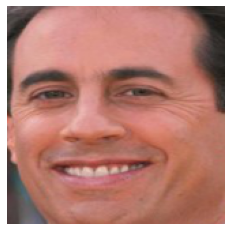

In [25]:
# Choose a random index
random.seed(100)
selection = random.choice([i for i in range(validX.shape[0])])

face = X_valid[selection]

pred_prob = model.predict_proba(validX[selection].reshape(1,-1))
pred = model.predict(validX[selection].reshape(1,-1))

celeb = label.inverse_transform(pred)

plt.imshow(face)
plt.axis('off')

print(f'Probability : {np.max(pred_prob)*100}, \nCelebrity - Predicted : {celeb}, Acutal : {y_valid[selection]}')

### T-SNE Plot

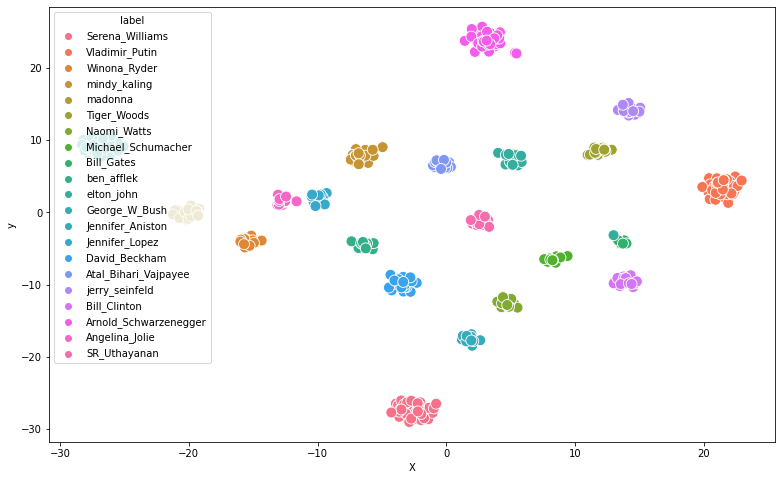

In [26]:
from sklearn.manifold import TSNE
import seaborn as sns

tsne = TSNE(learning_rate=100)

tsne_features = tsne.fit_transform(trainX)

X = tsne_features[:,0]
y = tsne_features[:,1]

dataset = pd.DataFrame(data=y_train, columns=['label'])
dataset['X'] = X
dataset['y'] = y

plt.figure(figsize=(13,8))
sns.scatterplot(data=dataset, x='X', y='y', hue='label', s=120)

## Test Data

### Test Data Loading

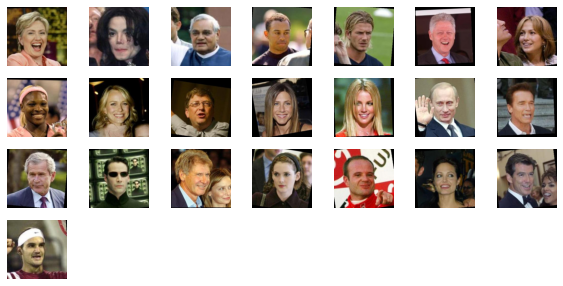

In [27]:
plt.figure(figsize=(10,5))
for i, filename in enumerate(os.listdir(TEST_PATH)):
    path = TEST_PATH + filename
    image = plt.imread(path)
    
    plt.subplot(4, 7, i+1)
    
    plt.axis('off')
    plt.imshow(image)
    
plt.show()

### Face Extraction

0it [00:00, ?it/s]

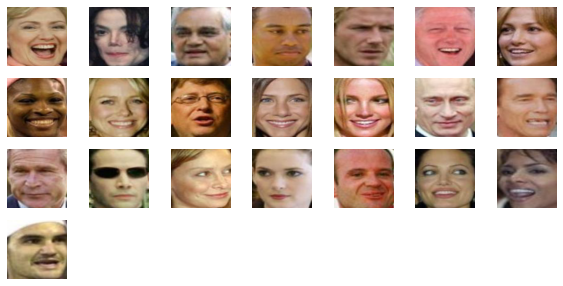

In [28]:
plt.figure(figsize=(10,5))
for i, filename in tqdm(enumerate(os.listdir(TEST_PATH))):
    path = TEST_PATH + filename
    
    face = extract_face(path)
    
    #print(i+1, face.shape)
    
    plt.subplot(4, 7, i+1)
    
    plt.axis('off')
    plt.imshow(face)
    
plt.show()

In [29]:

faces = list()
for file_name in tqdm(os.listdir(TEST_PATH)):
    path = TEST_PATH + file_name
    face = extract_face(path)
        
    faces.append(face)
  

  0%|          | 0/22 [00:00<?, ?it/s]

In [30]:
test = np.asarray(faces)

In [31]:
test.shape

(22, 160, 160, 3)

In [32]:
print(test.ndim)

4


### Create Face Embeddings

In [33]:
model_emb = load_model('/content/gdrive/My Drive/data/facenet_keras.h5')


testX = list()

for pixels in tqdm(test):
    embedding = get_embedding(model_emb, pixels)
    testX.append(embedding)
testX = np.asarray(testX)

print('Test X :', testX.shape)

  0%|          | 0/22 [00:00<?, ?it/s]

Test X : (22, 128)


### Prediction

In [34]:
testX = norm.transform(testX)

In [35]:
predict_test = model.predict(testX)

In [36]:
test_probability = model.predict_proba(testX)

In [37]:
test_probability

array([[0.04565703, 0.03017689, 0.03692445, 0.0284461 , 0.0159587 ,
        0.07513252, 0.01793871, 0.03862046, 0.07172555, 0.02199404,
        0.02519409, 0.01647993, 0.01664474, 0.0399617 , 0.02551669,
        0.04997177, 0.03053263, 0.02901917, 0.02086427, 0.3170075 ,
        0.04623304],
       [0.0788408 , 0.05508636, 0.04624968, 0.03108159, 0.01798733,
        0.03640905, 0.01995818, 0.03552926, 0.0643224 , 0.02392194,
        0.01908118, 0.04469445, 0.01458397, 0.01748176, 0.02125176,
        0.13681226, 0.07139871, 0.07130607, 0.02429114, 0.05545945,
        0.11425266],
       [0.01916879, 0.03531842, 0.56804869, 0.0157871 , 0.00506836,
        0.01354821, 0.02156936, 0.01037448, 0.02145851, 0.00941272,
        0.01466599, 0.02261626, 0.01096983, 0.03049995, 0.01712085,
        0.0128525 , 0.01378981, 0.04084108, 0.0089924 , 0.0591908 ,
        0.04870589],
       [0.01724641, 0.05703656, 0.01813444, 0.0158346 , 0.01038679,
        0.03530579, 0.01013198, 0.00844311, 0.0116056

Probability: {50.65137485119702} 
 Celebrity Predicted: ['Tiger_Woods']


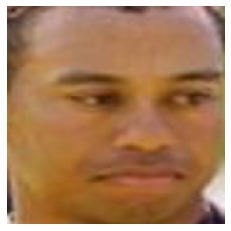

In [47]:
# Choose a random index
#random.seed(25)
selection = random.choice([i for i in range(testX.shape[0])])

face = test[selection]

yhat_prob = model.predict_proba(testX[selection].reshape(1,-1))
yhat = model.predict(testX[selection].reshape(1,-1))

celeb = label.inverse_transform(yhat)

plt.imshow(face)
plt.axis('off')

if np.max(yhat_prob) > 0.4:
  print('Probability:', {np.max(yhat_prob)*100}, '\n Celebrity Predicted:' , celeb)
else:
	print("Unidentified")

In [51]:
list_test_prob = [max(p) for p in test_probability]

In [52]:
list_test_prob

[0.3170074978195737,
 0.13681225899725394,
 0.5680486914541942,
 0.5065137485119702,
 0.5696831332365642,
 0.613876167374282,
 0.3689156049278409,
 0.7351660455076785,
 0.5020757433148616,
 0.45746885735061926,
 0.5930481265721261,
 0.09323747385663333,
 0.7512898791192607,
 0.6136081286206203,
 0.743854436395426,
 0.17646493671213528,
 0.18170056812843183,
 0.5382455219026936,
 0.10765254857901853,
 0.5081512085798887,
 0.13785806053350194,
 0.154854988341801]

### Test Submission

In [53]:
label_predicted = label.inverse_transform(predict_test)

In [54]:
label_predicted

array(['madonna', 'Winona_Ryder', 'Atal_Bihari_Vajpayee', 'Tiger_Woods',
       'David_Beckham', 'Bill_Clinton', 'Jennifer_Lopez',
       'Serena_Williams', 'Naomi_Watts', 'Bill_Gates', 'Jennifer_Aniston',
       'Jennifer_Lopez', 'Vladimir_Putin', 'Arnold_Schwarzenegger',
       'George_W_Bush', 'ben_afflek', 'elton_john', 'Winona_Ryder',
       'ben_afflek', 'Angelina_Jolie', 'Jennifer_Lopez', 'mindy_kaling'],
      dtype='<U21')

In [55]:
test_label = []
i=0
for p in list_test_prob:
  if p >0.4:
    label = label_predicted[i]
  else:
    label = "Unidentified"
  test_label.append(label)
  i +=1

In [56]:
test_label

['Unidentified',
 'Unidentified',
 'Atal_Bihari_Vajpayee',
 'Tiger_Woods',
 'David_Beckham',
 'Bill_Clinton',
 'Unidentified',
 'Serena_Williams',
 'Naomi_Watts',
 'Bill_Gates',
 'Jennifer_Aniston',
 'Unidentified',
 'Vladimir_Putin',
 'Arnold_Schwarzenegger',
 'George_W_Bush',
 'Unidentified',
 'Unidentified',
 'Winona_Ryder',
 'Unidentified',
 'Angelina_Jolie',
 'Unidentified',
 'Unidentified']

In [74]:
df_preds = pd.DataFrame(test_label, columns=['Person Name'])

df_preds.index = np.arange(1,len(df_preds)+1)
df_preds.head()

,Person Name
1,Unidentified
2,Unidentified
3,Atal_Bihari_Vajpayee
4,Tiger_Woods
5,David_Beckham


In [75]:
df_preds.to_csv('1005_CV2_Capstone_Project.csv', header=False )